# Part 1: Installation and Environment Setup
### Anaconda Installation
1. Visit https://www.anaconda.com/download
2. Download and install Anaconda

### PyTorch Installation
1. Visit https://pytorch.org/get-started/locally/
2. Select the appropriate variables based on your system - note that pip and conda will install their own versions of relevant CUDA libraries, so no need to align with your NVIDIA version if looking to use GPU

# Part 2: PyTorch Background

### Introduction to tensors


In [185]:
# Import necessary libraries
import torch
import numpy as np

# Creating tensors in PyTorch

# From a list
tensor_from_list = torch.tensor([1, 2, 3, 4])
print("Tensor from list:", tensor_from_list)

# Using built-in functions
zeros_tensor = torch.zeros(2, 2)
print("\nZeros tensor:\n", zeros_tensor)

ones_tensor = torch.ones(2, 2)
print("\nOnes tensor:\n", ones_tensor)

random_tensor = torch.rand(2, 2)  # Uniformly distributed values between 0 and 1
print("\nRandom tensor:\n", random_tensor)



Tensor from list: tensor([1, 2, 3, 4])

Zeros tensor:
 tensor([[0., 0.],
        [0., 0.]])

Ones tensor:
 tensor([[1., 1.],
        [1., 1.]])

Random tensor:
 tensor([[0.5474, 0.7707],
        [0.1607, 0.0563]])


### Basic tensor operations


In [186]:
# Addition
a = torch.tensor([1, 2, 3])
b = torch.tensor([4, 5, 6])
result = a + b
print("Addition:", result)

# Multiplication (element-wise)
result = a * b
print("\nElement-wise multiplication:", result)

# Dot product
result = torch.dot(a, b)
print("\nDot product:", result)

# Matrix multiplication
matrix1 = torch.tensor([[1, 2], [3, 4]])
matrix2 = torch.tensor([[2, 0], [0, 2]])
result1 = torch.mm(matrix1, matrix2)  # For 2D matrices
print("\nMatrix multiplication:\n", result1)

result2 = matrix1*matrix2
print("\nElement-wise multiplication:\n", result2)


Addition: tensor([5, 7, 9])

Element-wise multiplication: tensor([ 4, 10, 18])

Dot product: tensor(32)

Matrix multiplication:
 tensor([[2, 4],
        [6, 8]])

Element-wise multiplication:
 tensor([[2, 0],
        [0, 8]])


### Tensor indexing and slicing


In [187]:

tensor = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("\nOriginal tensor:\n", tensor)

# Getting a single value
print(tensor[0, 1])  # Outputs 2
print(tensor[0][1])  # Outputs 2

# Slicing
print(tensor[0, :])  # First row
print(tensor[0])  # First row

print(tensor[:, 0])  # First column
print(tensor[1:3, 1:3])  # Sub-matrix from rows 1 to 2 and columns 1 to 2


Original tensor:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor(2)
tensor(2)
tensor([1, 2, 3])
tensor([1, 2, 3])
tensor([1, 4, 7])
tensor([[5, 6],
        [8, 9]])


### Converting between Numpy and PyTorch tensors


In [188]:

# PyTorch tensor to Numpy array
numpy_array = tensor.numpy()
print("Numpy array:\n", numpy_array)

# Numpy array to PyTorch tensor
new_tensor = torch.from_numpy(numpy_array)
print("\nPyTorch tensor:\n", new_tensor)

# Note: The numpy array and the torch tensor will share the same memory location, 
# so changes to one will affect the other.

Numpy array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

PyTorch tensor:
 tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])


# Part 3: MNIST Example

Epoch 1/10, Loss: 0.4039, Train Acc: 91.89%, Val Acc: 91.95%
Epoch 2/10, Loss: 0.2153, Train Acc: 95.29%, Val Acc: 95.27%
Epoch 3/10, Loss: 0.1629, Train Acc: 96.06%, Val Acc: 95.83%
Epoch 4/10, Loss: 0.1313, Train Acc: 96.94%, Val Acc: 96.53%
Epoch 5/10, Loss: 0.1144, Train Acc: 96.99%, Val Acc: 96.38%
Epoch 6/10, Loss: 0.1022, Train Acc: 96.47%, Val Acc: 96.02%
Epoch 7/10, Loss: 0.0943, Train Acc: 97.71%, Val Acc: 96.95%
Epoch 8/10, Loss: 0.0865, Train Acc: 97.71%, Val Acc: 96.83%
Epoch 9/10, Loss: 0.0794, Train Acc: 98.12%, Val Acc: 97.05%
Epoch 10/10, Loss: 0.0742, Train Acc: 98.32%, Val Acc: 97.17%
Finished Training


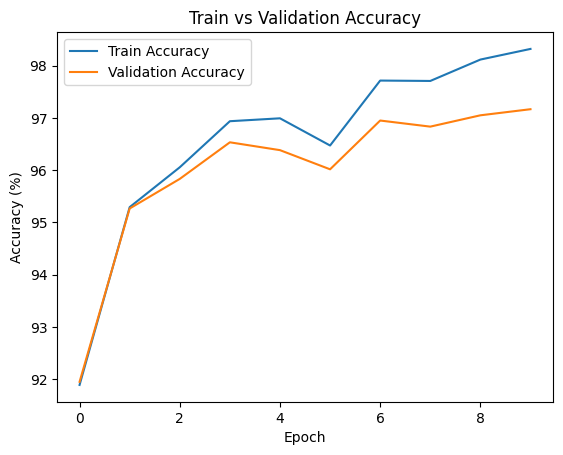

In [189]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Check for CUDA availability
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28*28, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

net = Net().to(device)

# Define loss function and optimizer


def get_accuracy(loader, net):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            images, labels = data
            images, labels = images.to(device), labels.to(device)
            outputs = net(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


def train(net, num_epochs=20, save_name='mnist_model.pth'):

    # Load MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    full_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    # Splitting into train and validation sets: 90% train, 10% validation
    train_size = int(0.9 * len(full_trainset))
    val_size = len(full_trainset) - train_size
    trainset, valset = torch.utils.data.random_split(full_trainset, [train_size, val_size])


    trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True, num_workers=2)
    valloader = torch.utils.data.DataLoader(valset, batch_size=64, shuffle=False, num_workers=2)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
    # Train the network

    train_accuracies = []
    val_accuracies = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs, labels) in enumerate(trainloader, 0):
            inputs, labels = inputs.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
        train_acc = get_accuracy(trainloader, net)
        val_acc = get_accuracy(valloader, net)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader):.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

    print("Finished Training")
    # Save the model
    torch.save(net.state_dict(), save_name)
    return train_accuracies, val_accuracies
train_accuracies, val_accuracies = train(net, num_epochs=10, save_name='dense_mnist_classifier.pth')

def visualize_train_val_accuracy(train_accuracies, val_accuracies):
    plt.plot(train_accuracies, label='Train Accuracy')
    plt.plot(val_accuracies, label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy (%)')
    plt.title('Train vs Validation Accuracy')
    plt.legend()
    plt.show()

visualize_train_val_accuracy(train_accuracies, val_accuracies)

Epoch 1/10, Loss: 0.3611, Train Acc: 97.14%, Val Acc: 97.68%
Epoch 2/10, Loss: 0.0780, Train Acc: 98.23%, Val Acc: 98.23%
Epoch 3/10, Loss: 0.0557, Train Acc: 98.65%, Val Acc: 98.28%
Epoch 4/10, Loss: 0.0440, Train Acc: 98.76%, Val Acc: 98.45%
Epoch 5/10, Loss: 0.0364, Train Acc: 98.84%, Val Acc: 98.55%
Epoch 6/10, Loss: 0.0309, Train Acc: 99.44%, Val Acc: 98.80%
Epoch 7/10, Loss: 0.0260, Train Acc: 99.44%, Val Acc: 98.65%
Epoch 8/10, Loss: 0.0224, Train Acc: 99.53%, Val Acc: 99.02%
Epoch 9/10, Loss: 0.0182, Train Acc: 99.61%, Val Acc: 98.92%
Epoch 10/10, Loss: 0.0169, Train Acc: 99.46%, Val Acc: 98.95%
Finished Training


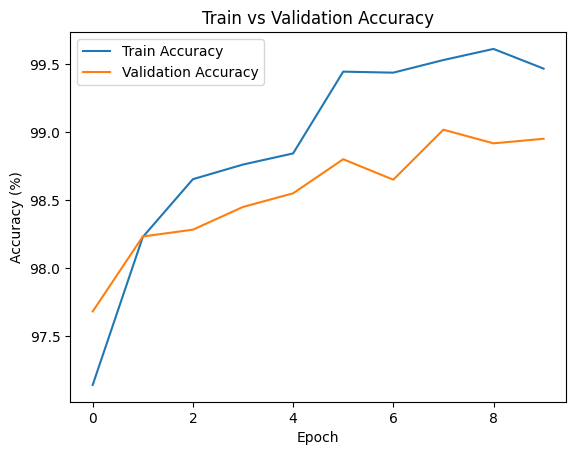

In [190]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # Convolutional layers
        self.conv1 = nn.Conv2d(1, 8, kernel_size=3, stride=1, padding=1)   # Input: 1x28x28, Output: 32x28x28
        self.conv2 = nn.Conv2d(8, 16, kernel_size=3, stride=1, padding=1)  # Input: 32x28x28, Output: 64x28x28
        
        # Max pooling
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)        # Input: 64x28x28, Output: 64x14x14
        
        # Fully connected layers (after two conv and one pool layer)
        self.fc1 = nn.Linear(16 * 7 * 7, 64)
        self.fc2 = nn.Linear(64, 10)
        
    def forward(self, x):
        # Apply first convolutional layer, followed by ReLU and max pooling
        x = self.pool(torch.relu(self.conv1(x)))  # Output size: 32x14x14
        
        # Apply second convolutional layer, followed by ReLU and max pooling
        x = self.pool(torch.relu(self.conv2(x)))  # Output size: 64x7x7
        # Flatten the tensor
        x = x.view(-1, 16 * 7 * 7)

        # Apply first fully connected layer with ReLU
        x = torch.relu(self.fc1(x))
        
        # Apply second fully connected layer
        x = self.fc2(x)
        
        return x

convnet = ConvNet().to(device)
train_accuracies, val_accuracies = train(convnet, num_epochs=10, save_name='conv_mnist_classifier.pth')

visualize_train_val_accuracy(train_accuracies, val_accuracies)

In [191]:
def print_trainable_parameters(model):
    total_params = 0
    for name, param in model.named_parameters():
        if param.requires_grad:  # ensures only trainable parameters are counted
            num_params = param.numel()  # returns total number of elements
            total_params += num_params
            print(f"{name: <20}: {num_params}")
    print(f"Total trainable parameters: {total_params}")


print_trainable_parameters(net)
print_trainable_parameters(convnet)


fc1.weight          : 50176
fc1.bias            : 64
fc2.weight          : 640
fc2.bias            : 10
Total trainable parameters: 50890
conv1.weight        : 72
conv1.bias          : 8
conv2.weight        : 1152
conv2.bias          : 16
fc1.weight          : 50176
fc1.bias            : 64
fc2.weight          : 640
fc2.bias            : 10
Total trainable parameters: 52138


# Part 4: More Complex MNIST

In [192]:
class PairedMNISTDataset(torch.utils.data.Dataset):
    def __init__(self, mnist_dataset):
        self.mnist_dataset = mnist_dataset

    def __len__(self):
        return len(self.mnist_dataset) // 2  # We'll use pairs, so we return half the length

    def __getitem__(self, index):
        image1, label1 = self.mnist_dataset[2*index]
        image2, label2 = self.mnist_dataset[2*index + 1]
        return (image1, image2), label1 + label2



In [193]:
def get_accuracy(loader, net):
    correct = 0
    total = 0
    with torch.no_grad():
        for (image1, image2), labels in loader:
            image1, image2, labels = image1.to(device), image2.to(device), labels.to(device)
            outputs = net((image1, image2))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total


In [194]:
def train(net, num_epochs=20, save_name='mnist_model.pth'):

    # Load MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    full_trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)

    # Splitting into train and validation sets: 90% train, 10% validation
    train_size = int(0.9 * len(full_trainset))
    val_size = len(full_trainset) - train_size
    trainset, valset = torch.utils.data.random_split(full_trainset, [train_size, val_size])

    paired_trainset = PairedMNISTDataset(trainset)
    paired_valset = PairedMNISTDataset(valset)

    trainloader = torch.utils.data.DataLoader(paired_trainset, batch_size=64, shuffle=True, num_workers=2)
    valloader = torch.utils.data.DataLoader(paired_valset, batch_size=64, shuffle=False, num_workers=2)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)
    # Train the network

    train_accuracies = []
    val_accuracies = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, ((image1, image2), labels) in enumerate(trainloader, 0):
            image1, image2, labels = image1.to(device), image2.to(device), labels.to(device)

            # Zero the parameter gradients
            optimizer.zero_grad()

            # Forward + backward + optimize
            outputs = net((image1, image2))
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            
        train_acc = get_accuracy(trainloader, net)
        val_acc = get_accuracy(valloader, net)
        train_accuracies.append(train_acc)
        val_accuracies.append(val_acc)
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(trainloader):.4f}, Train Acc: {train_acc:.2f}%, Val Acc: {val_acc:.2f}%")

    print("Finished Training")
    # Save the model
    torch.save(net.state_dict(), save_name)
    return train_accuracies, val_accuracies

In [195]:
class PairedMNISTNet(nn.Module):
    def __init__(self):
        super(PairedMNISTNet, self).__init__()

        # First image branch
        self.branch1 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # Second image branch (same as the first)
        self.branch2 = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )

        # Fully connected layers
        self.fc1 = nn.Linear(64 * 7 * 7 * 2, 500)
        self.fc2 = nn.Linear(500, 19)  # 19 possible output classes

    def forward(self, x):
        x1, x2 = x  # Split the input into the two images
        x1 = self.branch1(x1)
        x2 = self.branch2(x2)

        # Concatenate the feature maps and feed through fully connected layers
        x = torch.cat((x1.view(x1.size(0), -1), x2.view(x2.size(0), -1)), dim=1)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

pairednet1 = PairedMNISTNet().to(device)


In [196]:
train_accuracies, val_accuracies = train(pairednet1, num_epochs=10, save_name='pairednet_2branch.pth')

Epoch 1/10, Loss: 2.3487, Train Acc: 47.72%, Val Acc: 49.30%
Epoch 2/10, Loss: 0.8465, Train Acc: 86.40%, Val Acc: 84.47%
Epoch 3/10, Loss: 0.3643, Train Acc: 92.31%, Val Acc: 89.73%
Epoch 4/10, Loss: 0.2233, Train Acc: 96.03%, Val Acc: 91.33%
Epoch 5/10, Loss: 0.1427, Train Acc: 97.45%, Val Acc: 91.07%
Epoch 6/10, Loss: 0.0945, Train Acc: 98.22%, Val Acc: 91.30%
Epoch 7/10, Loss: 0.0610, Train Acc: 98.91%, Val Acc: 92.10%
Epoch 8/10, Loss: 0.0367, Train Acc: 99.55%, Val Acc: 93.10%
Epoch 9/10, Loss: 0.0156, Train Acc: 99.87%, Val Acc: 93.33%
Epoch 10/10, Loss: 0.0064, Train Acc: 99.80%, Val Acc: 93.03%
Finished Training


In [197]:
class PairedMNISTNet(nn.Module):
    def __init__(self, pretrained_classifier):
        super(PairedMNISTNet, self).__init__()
        
        # Use the feature extraction part of the pre-trained classifier
        self.mnist_classifier = pretrained_classifier

    def forward(self, x):
        x1, x2 = x  # Split the input into the two images
        
        x1 = self.mnist_classifier(x1)
        x2 = self.mnist_classifier(x2)

        # Sum the output probabilities
        sum_indices = torch.add(torch.argmax(x1, dim=1), torch.argmax(x2, dim=1))

        # Convert to one-hot encoded vectors
        x = torch.zeros(sum_indices.size(0), 19, device=x1.device).scatter_(1, sum_indices.unsqueeze(-1), 1.0)
        return x



mnist_classifier = ConvNet().to(device)
mnist_classifier.load_state_dict(torch.load('conv_mnist_classifier.pth'))
pairednet2 = PairedMNISTNet(mnist_classifier).to(device)


In [198]:
def evaluate(net, batch_size=64):
    # Load MNIST dataset
    transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.5,), (0.5,))
    ])
    testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

    # Convert testset to PairedMNISTDataset
    paired_testset = PairedMNISTDataset(testset)
    testloader = torch.utils.data.DataLoader(paired_testset, batch_size=batch_size, shuffle=False, num_workers=2)

    net.eval()  # Set the network to evaluation mode

    correct = 0
    total = 0
    with torch.no_grad():
        for (image1, image2), labels in testloader:
            image1, image2, labels = image1.to(device), image2.to(device), labels.to(device)

            outputs = net((image1, image2))
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    accuracy = 100 * correct / total
    print(f"Accuracy on test set: {accuracy:.2f}%")
    return accuracy


In [199]:
# Evaluate the network on the test set
test_accuracy1 = evaluate(pairednet1)
test_accuracy2 = evaluate(pairednet2)

Accuracy on test set: 93.72%
Accuracy on test set: 97.24%
